In [19]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [20]:
def reverse_value(img):
    h,w = img.shape
    dst = np.zeros(img.shape)
    for i in range(h):
        for j in range(w):
            dst[i,j] = 255-img[i,j]
    return dst


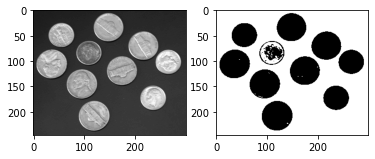

In [21]:
# 利用大津法OTSU进行二值化
img = cv2.imread("./coins.png")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(121)
plt.imshow(gray,cmap='gray')
plt.subplot(122)
plt.imshow(thresh,cmap='gray')

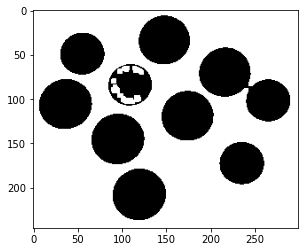

In [22]:
# 去除图像中噪声
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
plt.imshow(opening,cmap='gray')

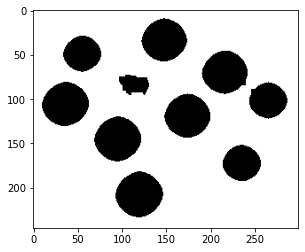

In [23]:
# 利用膨胀dilate的方法获得确定的背景
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg,cmap='gray')

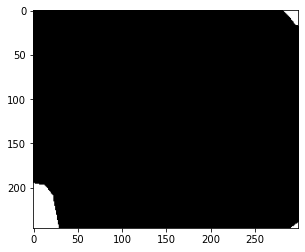

In [24]:
# 获得确定的前景
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5) # 计算非零点到零点的最近距离
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
plt.imshow(sure_fg,cmap='gray')

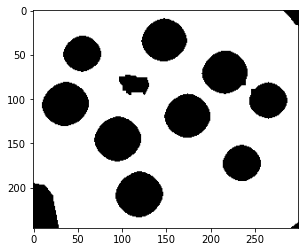

In [25]:
# 利用确定的背景减去前景，得到未知区域
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,cmap='gray')

In [26]:
# 利用确定的前景来生成markers
ret,markers = cv2.connectedComponents(sure_fg)
markers = markers + 1 # 背景是被标记为0的，所以需要进行+1
markers[unknown==255] = 0 # 将未知区域设置为0

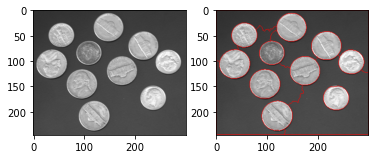

In [27]:
# 分水岭算法
markers = cv2.watershed(img,markers)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(121)
plt.imshow(img)
img[markers == -1] = [255,0,0] # 是边界的地方markers值为-1
plt.subplot(122)
plt.imshow(img)